# ABS Monthly Detailed Labour Force 6291

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Get-data-from-ABS" data-toc-modified-id="Get-data-from-ABS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get data from ABS</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#Set-up-some-constants-we-will-use-across-all-plots" data-toc-modified-id="Set-up-some-constants-we-will-use-across-all-plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Set-up some constants we will use across all plots</a></span></li><li><span><a href="#By-Age" data-toc-modified-id="By-Age-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>By Age</a></span></li><li><span><a href="#Quarterly-by-sector" data-toc-modified-id="Quarterly-by-sector-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Quarterly by sector</a></span></li></ul></li><li><span><a href="#Finished" data-toc-modified-id="Finished-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finished</a></span></li></ul></div>

## Python set-up

In [1]:
# system imports
import pathlib
import calendar
import datetime

# analytic imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# local imports
from finalise_plot import finalise_plot
from abs_common import (
    get_fs_constants,
    get_plot_constants,
    get_ABS_meta_and_data,
    get_identifier,
    plot_Mgrowth,
    recalibrate_series,
)

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting stuff
plt.style.use('ggplot')

In [2]:
catalogue_id = '6291'
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

## Get data from ABS

In [3]:
# do the data capture and extraction to a DataFrame
abs = get_ABS_meta_and_data(catalogue_id)
if abs is None:
    sys.exit(-1)
    
abs_q = get_ABS_meta_and_data(catalogue_id, 2)
if abs_q is None:
    sys.exit(-1)

Retrieving zip-file from cache ./ABS_CACHE/-statistics-labour-employment-and-unemployment-labour-force-australia-detailed-jul-2022-p6291_all_monthly_spreadsheets.zip
Retrieving zip-file from cache ./ABS_CACHE/-statistics-labour-employment-and-unemployment-labour-force-australia-detailed-jul-2022-p6291_all_quarterly_spreadsheets.zip


## Plot

### Set-up some constants we will use across all plots

In [4]:
# monthly data
meta = abs[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)

# quarterly data
meta_q = abs_q[META_DATA]
RECENT_Q, plot_times_q, plot_tags_q = get_plot_constants(meta)

### By Age

In [5]:
table = '01'
data = abs[table]
series_type = 'Original'

ages = [
    '15-24 years',
    '25-34 years',
    '35-44 years',
    '45-54 years',
    '55-64 years',
]

TOKEN = 'By Age'
plots = [
    f'> {TOKEN} ;  Participation rate ;  Persons ;',
    f'> {TOKEN} ;  Unemployment rate ;  Persons ;',
]

for plot in plots:
    idents = []
    for age in ages:
        desc = plot.replace(TOKEN, age)
        ident, units = get_identifier(meta, desc, series_type, table)
        idents.append(ident)
        
    for start, tag in zip(plot_times, plot_tags):
        df = data[data.index >= start] if start else data
        ax = df[idents].plot(lw=2)
        ax.legend(ages, loc='best')
        title = f'Australia: {plot}'
        finalise_plot(ax, title, units, tag, CHART_DIR,
                      rfooter=f'{source} {table}',
                      lfooter=f'{series_type.capitalize()} series',
                      #show=True,
                     )

### Quarterly by sector

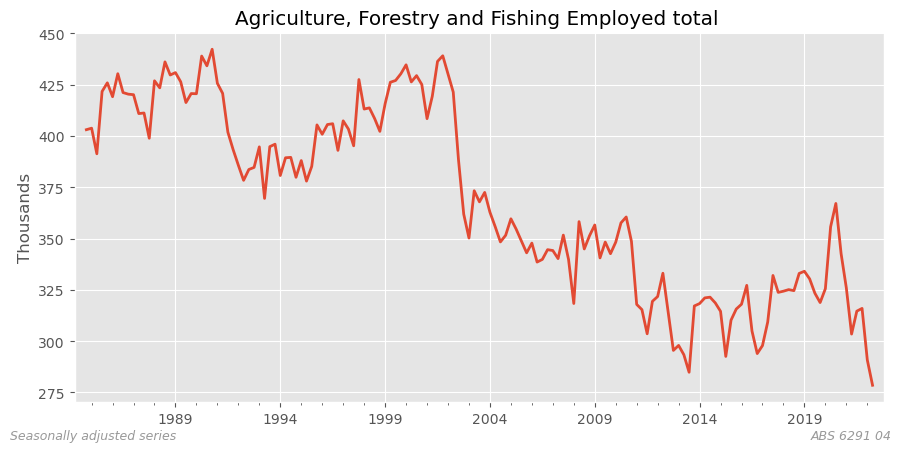

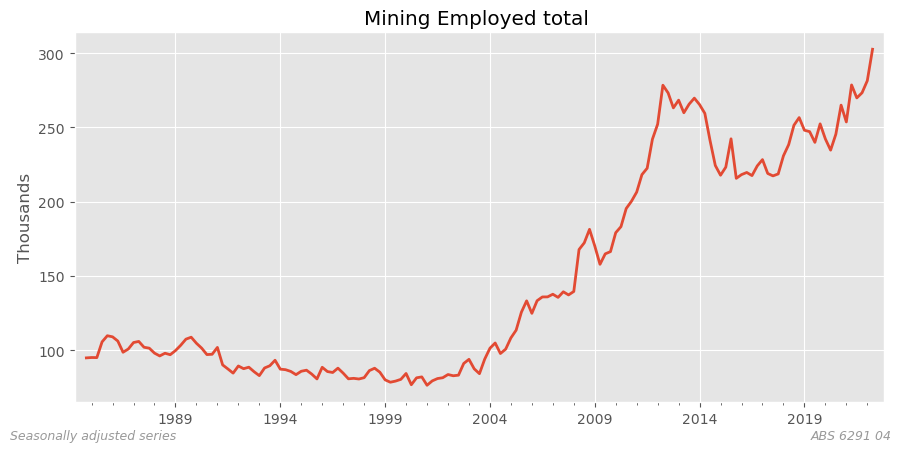

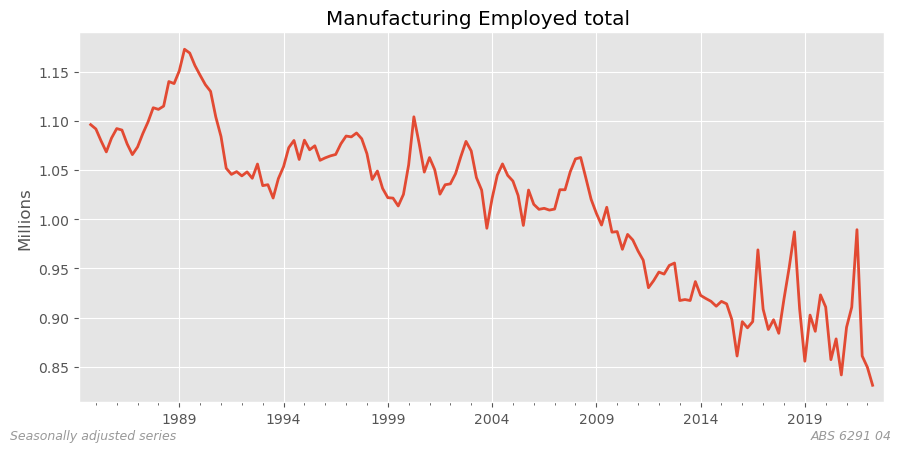

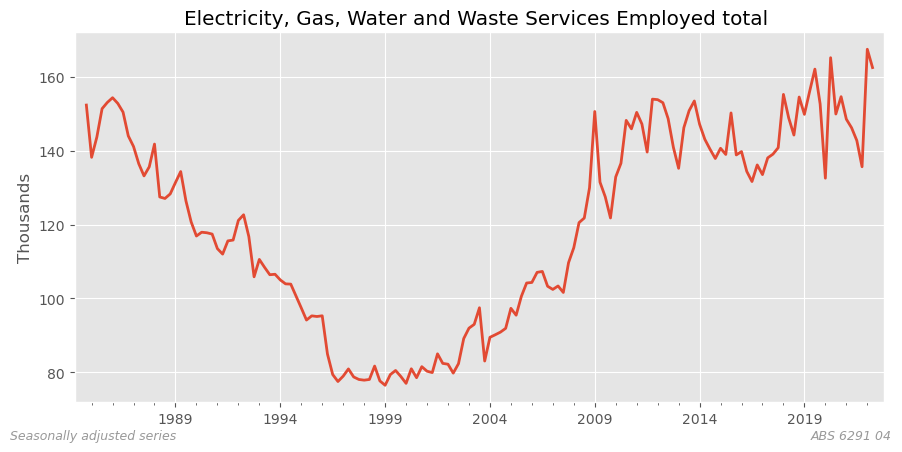

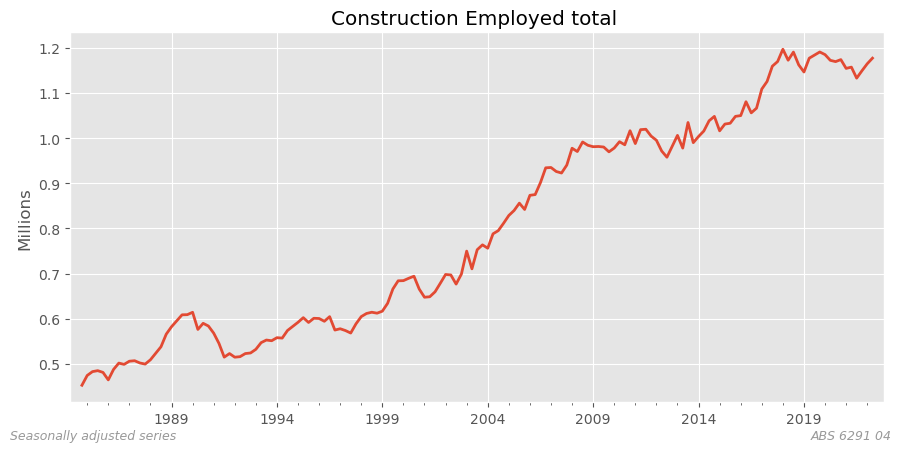

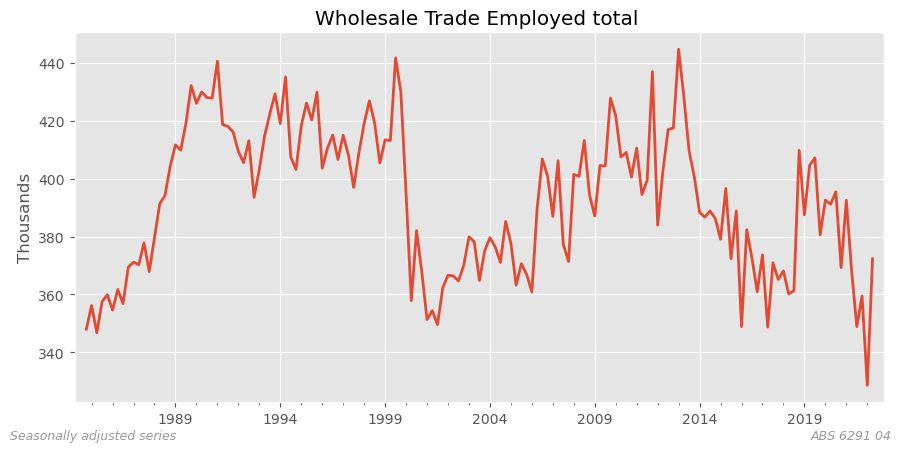

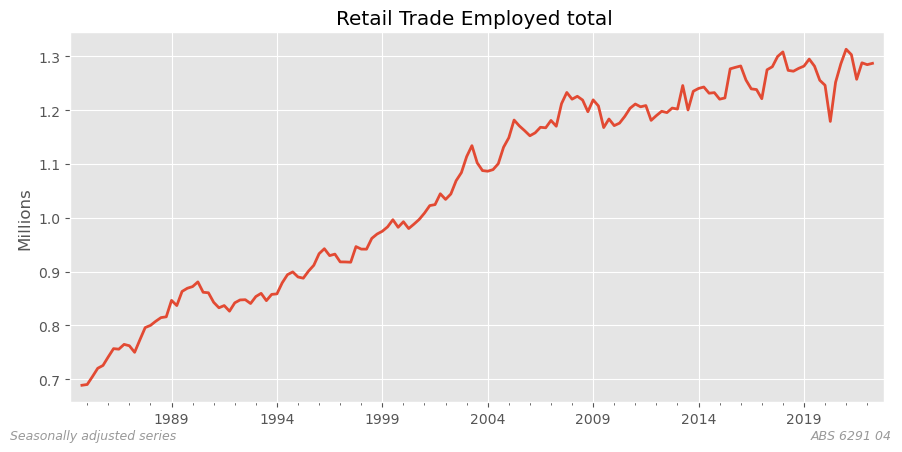

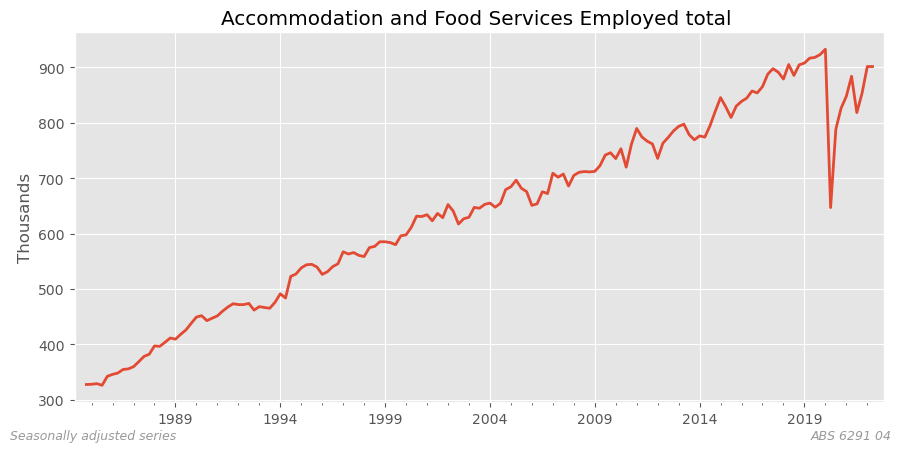

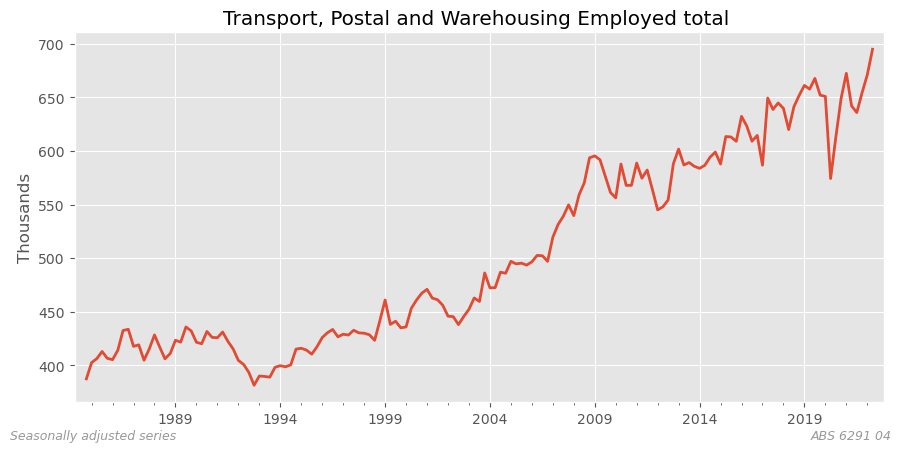

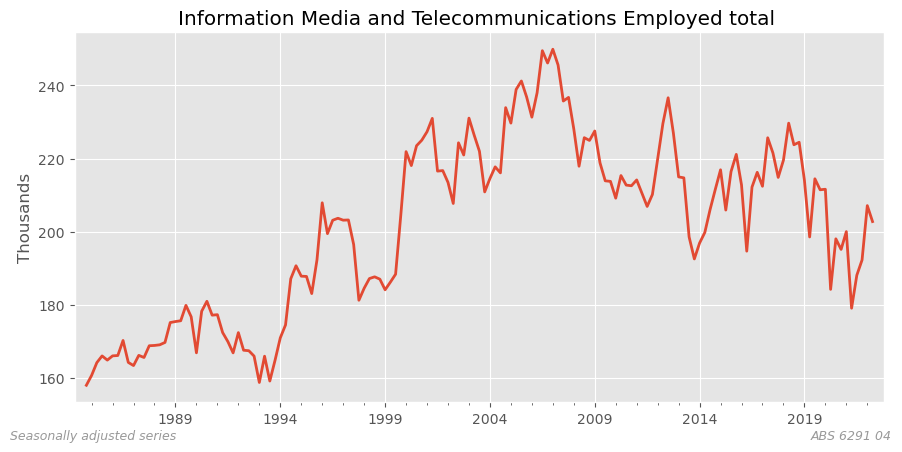

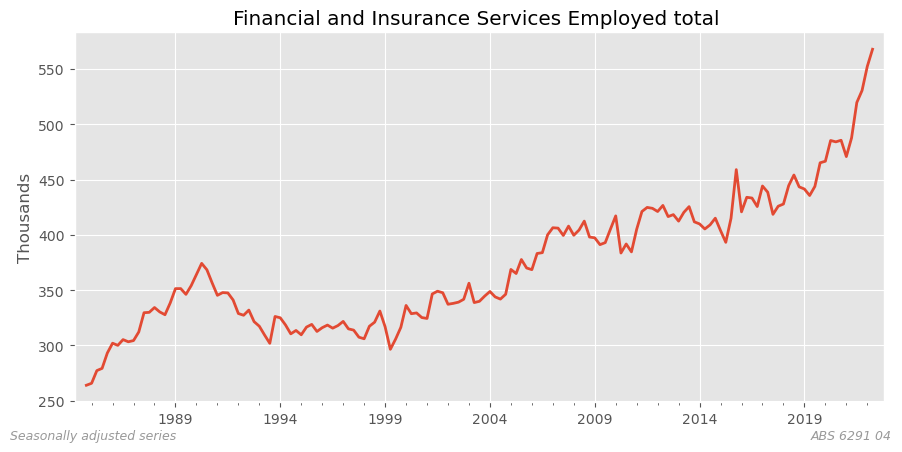

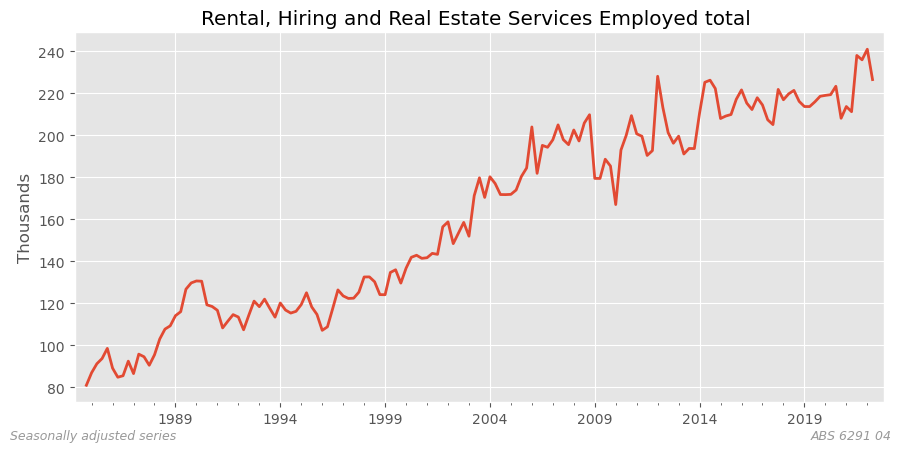

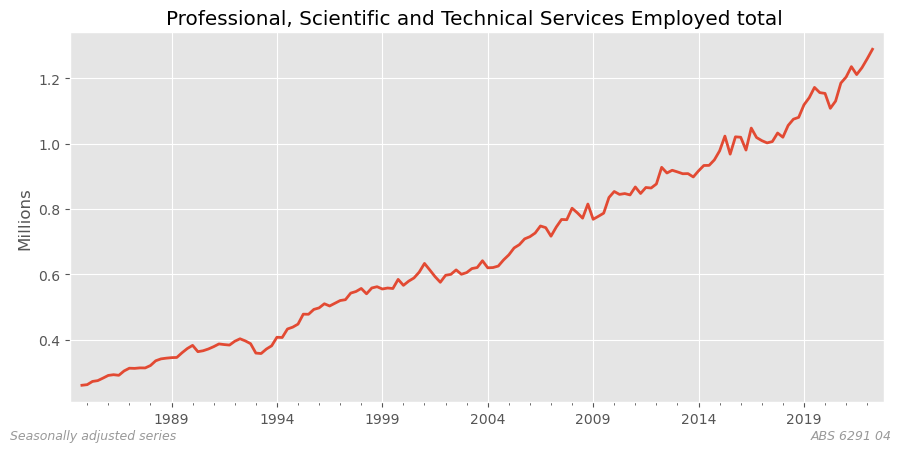

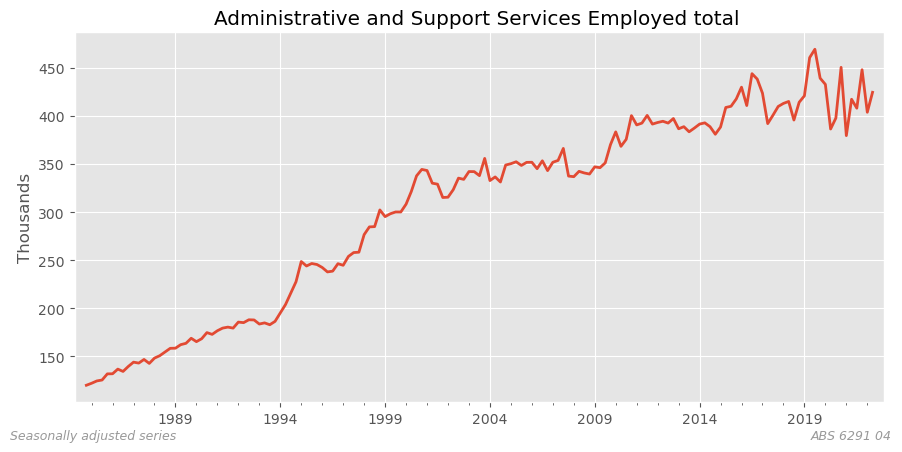

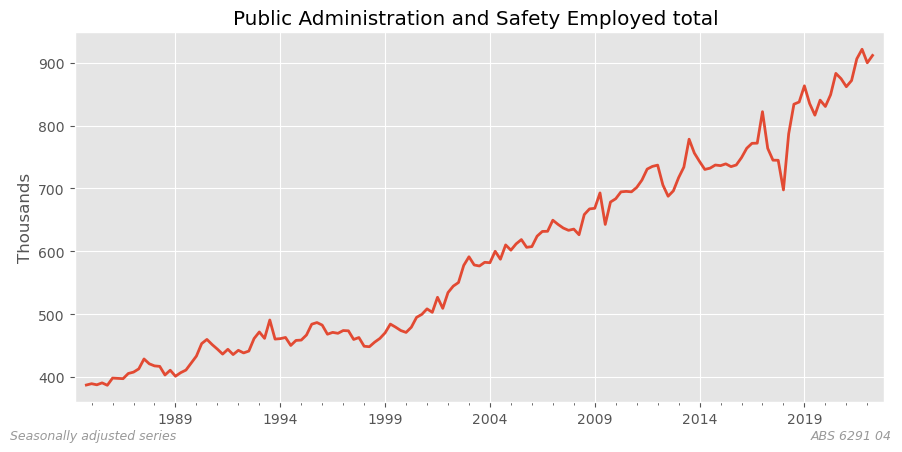

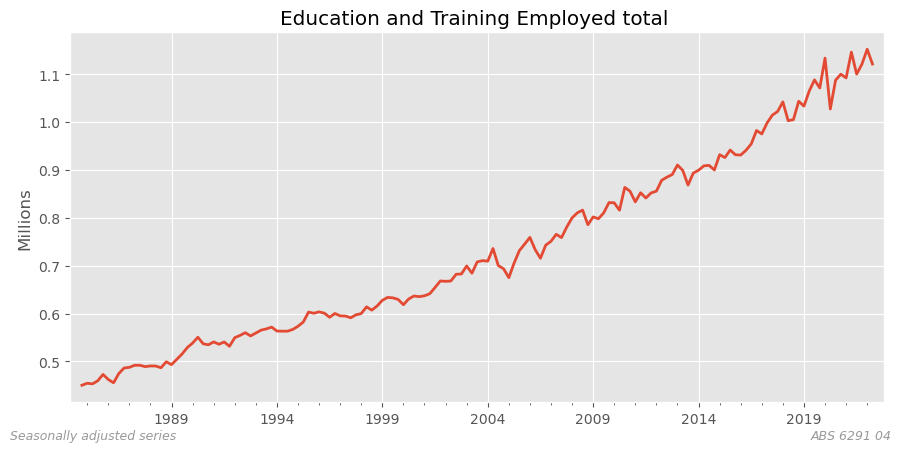

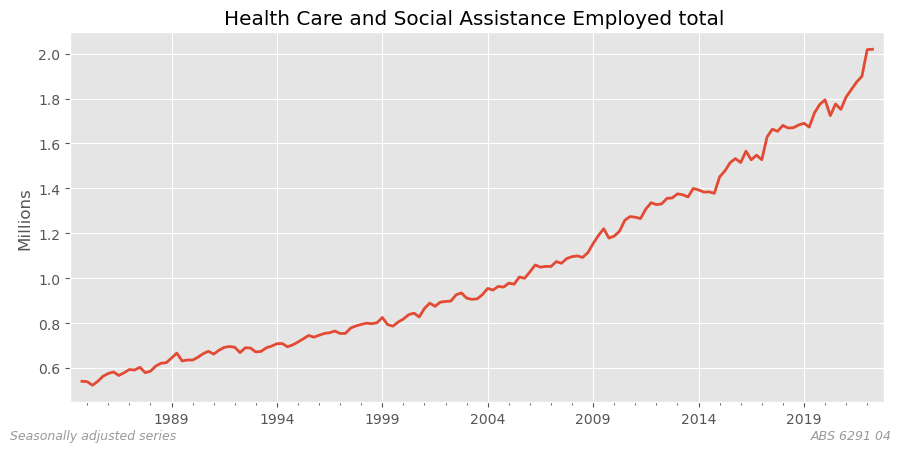

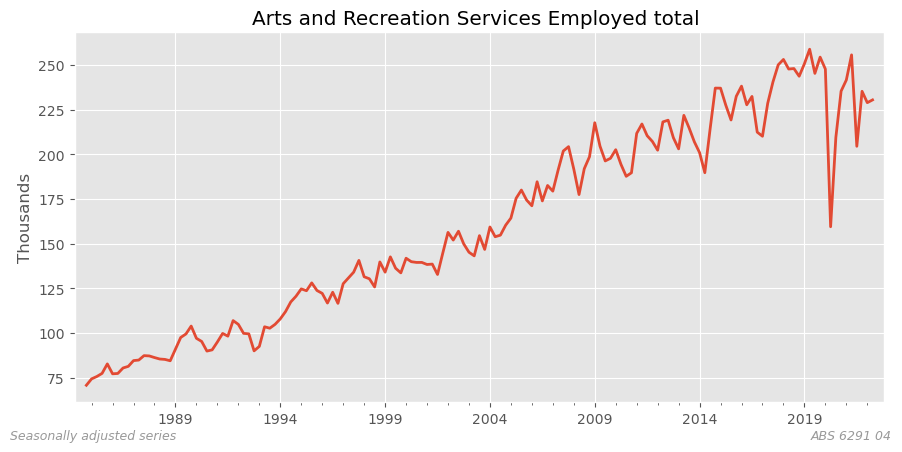

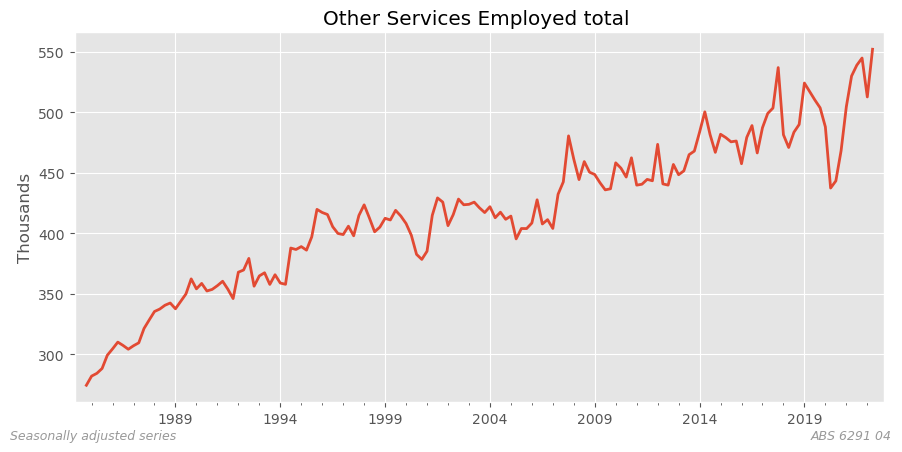

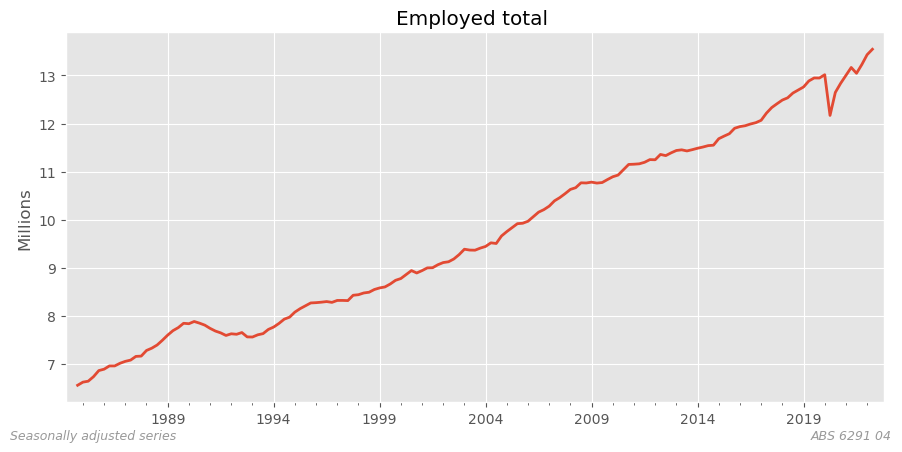

In [6]:
table = '04'
data_table = abs_q[table]
series_type = 'Seasonally Adjusted'
selection = meta_q[
    (meta_q['Series Type'] == series_type)
    & (meta_q['Table'] == table)
]

for index, series in selection.iterrows():
    title = (
        series['Data Item Description']
        .replace(';', '')
        .replace('  ', '')
    )
    id = series['Series ID']
    units = series['Unit']
    data = data_table[id]
    data, units = recalibrate_series(data, units)
    tag = 'all'
    ax = data.plot(lw=2)
    finalise_plot(ax, title, units, tag, CHART_DIR,
                  rfooter=f'{source} {table}',
                  lfooter=f'{series_type.capitalize()} series',
                  show=True,
                 )
    plt.close()

## Finished

In [7]:
print('Finished')

Finished
